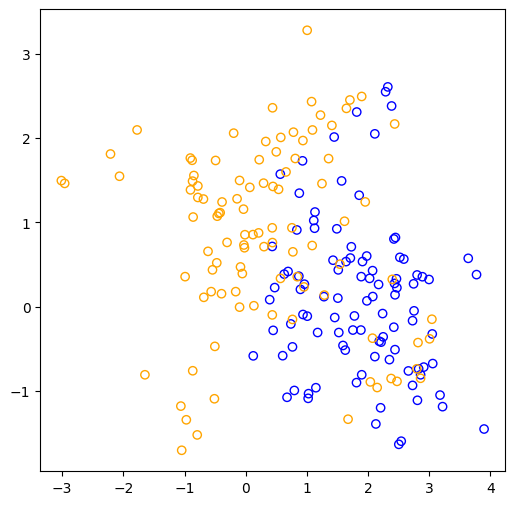

In [36]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)
m0 = np.random.multivariate_normal(mean = (1, 0), cov = np.eye(2), size = 10)
m1 = np.random.multivariate_normal(mean = (0, 1), cov = np.eye(2), size = 10)

N = 100
i0 = np.random.randint(0, 10, size = N)
i1 = np.random.randint(0, 10, size = N)

# Generate samples
M0 = m0[i0] + np.random.multivariate_normal(mean = (0, 0), cov = np.eye(2)/5, size = N)
M1 = m1[i1] + np.random.multivariate_normal(mean = (0, 0), cov = np.eye(2)/5, size = N)

X_train = np.concatenate((M0, M1))
y_train = np.concatenate((np.zeros(N, dtype=int), np.ones(N, dtype=int)))


fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X_train[:, 0], X_train[:, 1], color = np.array(['blue', 'orange'])[y_train],  facecolors='none')
plt.show()

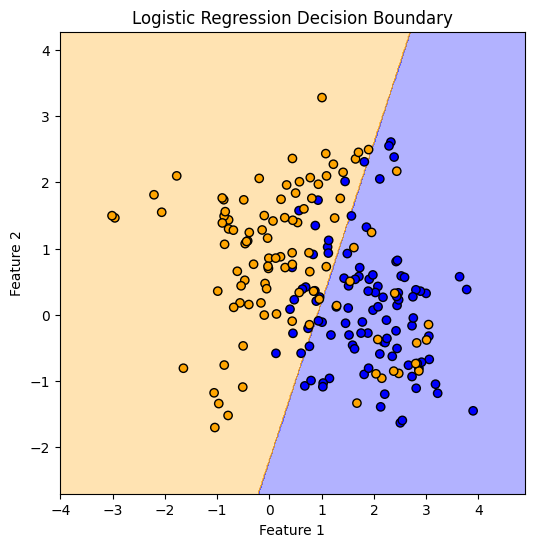

In [37]:
# Linear Regression Prediction
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the meshgrid
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 6))
cmap = plt.cm.colors.ListedColormap(['blue', 'orange'])
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
plt.scatter(X_train[:, 0], X_train[:, 1], color = np.array(['blue', 'orange'])[y_train], edgecolors='k') # Swapped colors for scatter plot
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

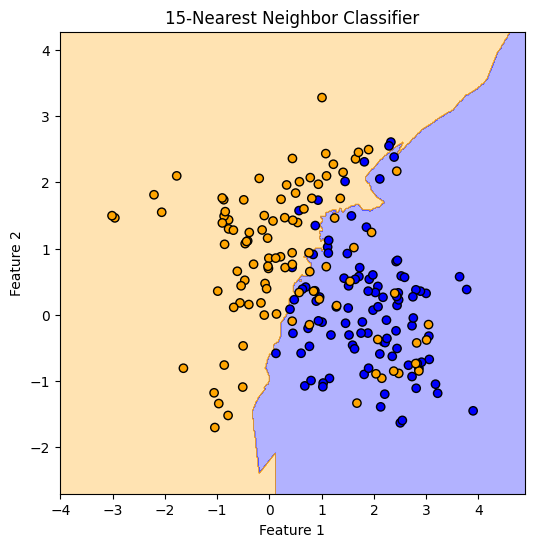

In [38]:
# K-NN Prediction
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 6))
cmap = plt.cm.colors.ListedColormap(['blue', 'orange'])
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
plt.scatter(X_train[:, 0], X_train[:, 1], color = np.array(['blue', 'orange'])[y_train], edgecolors='k') # Swapped colors for scatter plot
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("15-Nearest Neighbor Classifier")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

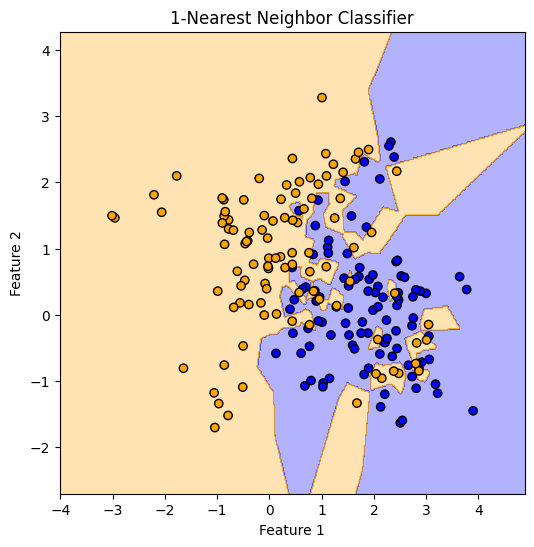

In [39]:
# K-NN Prediction
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 6))
cmap = plt.cm.colors.ListedColormap(['blue', 'orange'])
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
plt.scatter(X_train[:, 0], X_train[:, 1], color = np.array(['blue', 'orange'])[y_train], edgecolors='k') # Swapped colors for scatter plot
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("1-Nearest Neighbor Classifier")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [40]:
# Generate Test Data
n = 5000


prop = 1/2
print(f"proportion of blue dot", prop)
i00 = np.random.randint(0, 10, size = int(prop * 2 * n))
i01 = np.random.randint(0, 10, size = 2* n - int(prop * 2 * n))


T0 = m0[i00] + np.random.multivariate_normal(mean = (0, 0), cov = np.eye(2)/5, size = len(i00))
T1 = m1[i01] + np.random.multivariate_normal(mean = (0, 0), cov = np.eye(2)/5, size = len(i01))

X_test = np.concatenate((T0, T1))
y_test = np.concatenate((np.zeros(len(T0)), np.ones(len(T1))))


# Linear Model vs K-NN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Linear Model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_train_err = 1 - accuracy_score(lr.predict(X_train), y_train)
lr_test_err = 1 - accuracy_score(lr.predict(X_test), y_test)


# K-NN
k_values = np.arange(1, 152)
x_vals = len(X_train) / k_values
knn_train_err = []
knn_test_err = []

for k in k_values :
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)
  knn_train_err.append(1 - accuracy_score(model.predict(X_train), y_train))
  knn_test_err.append(1 - accuracy_score(model.predict(X_test), y_test))

# Optimal Bayes
from scipy.stats import multivariate_normal

def bayes_pred(X) :
  F0 = np.zeros(X.shape[0])
  for mk in m0 :
    F0 += multivariate_normal.pdf(X, mean = mk, cov = np.eye(2)/5)
  F0 /= len(m0)

  F1 = np.zeros(X.shape[0])
  for mk in m1 :
    F1 += multivariate_normal.pdf(X, mean = mk, cov = np.eye(2)/5)
  F1 /= len(m1)

  return (F1 >= F0).astype(int)


bayes_train_err = 1-accuracy_score(y_train, bayes_pred(X_train))
bayes_test_err = 1-accuracy_score(y_test, bayes_pred(X_test))




proportion of blue dot 0.5


/tmp/ipython-input-3864344049.py:14: RuntimeWarning: divide by zero encountered in divide
  top = ax.secondary_xaxis('top', functions=(lambda x : 2*N/x, lambda x : 2*N/x))


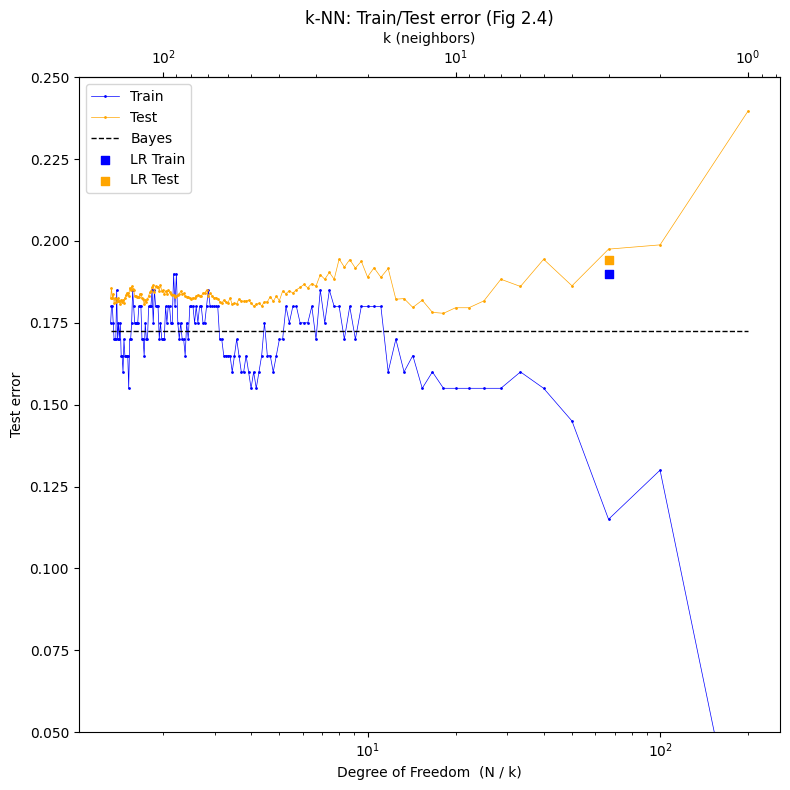

In [41]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(x_vals, knn_train_err, lw=0.5, label="Train", marker='o', ms=1, color = 'blue')
ax.plot(x_vals, knn_test_err,  lw=0.5, label="Test",  marker='o', ms=1, color = 'orange')
ax.hlines(y=bayes_test_err, xmin=x_vals.min(), xmax=x_vals.max(), colors='black', linestyles='--', lw=1, label='Bayes')
ax.scatter(2 * N / 3, lr_train_err, color="blue", marker="s", s=30, label="LR Train")
ax.scatter(2 * N / 3, lr_test_err, color="orange", marker="s", s=30, label="LR Test")

ax.set_xscale("log")
ax.set_xlabel("Degree of Freedom  (N / k)")
ax.set_ylabel("Test error")
ax.set_title("k-NN: Train/Test error (Fig 2.4)")
ax.set_ylim(0.05, 0.25)
ax.legend()
top = ax.secondary_xaxis('top', functions=(lambda x : 2*N/x, lambda x : 2*N/x))
top.set_xlabel("k (neighbors)")
plt.tight_layout()
plt.show()